# Integrating LiDAR data with camera data

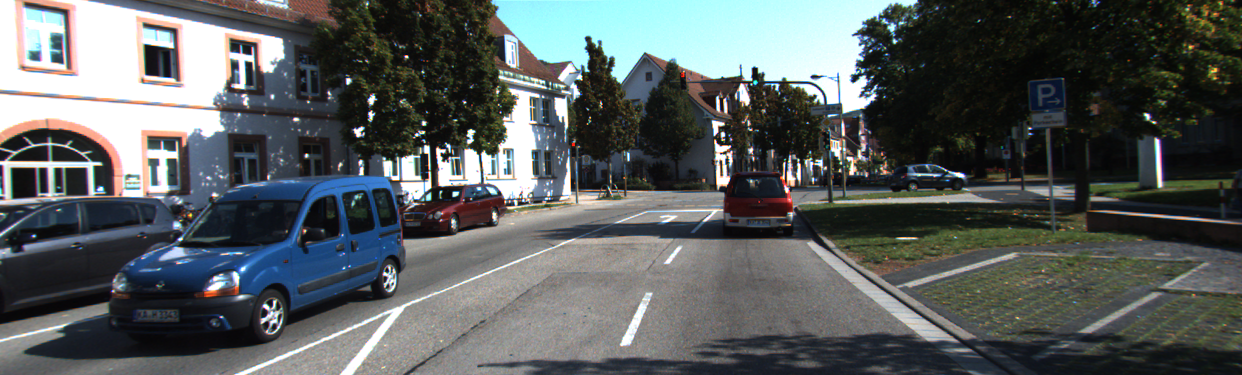

In [30]:
from IPython.display import Image

Image(filename='C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\image_02\\data\\0000000326.png')

# Process
  
***  

For converting coordinate systems, there are several steps.  
To help your understanding, I made a simple slide. The codes below are proceeding as these steps.  
  
  

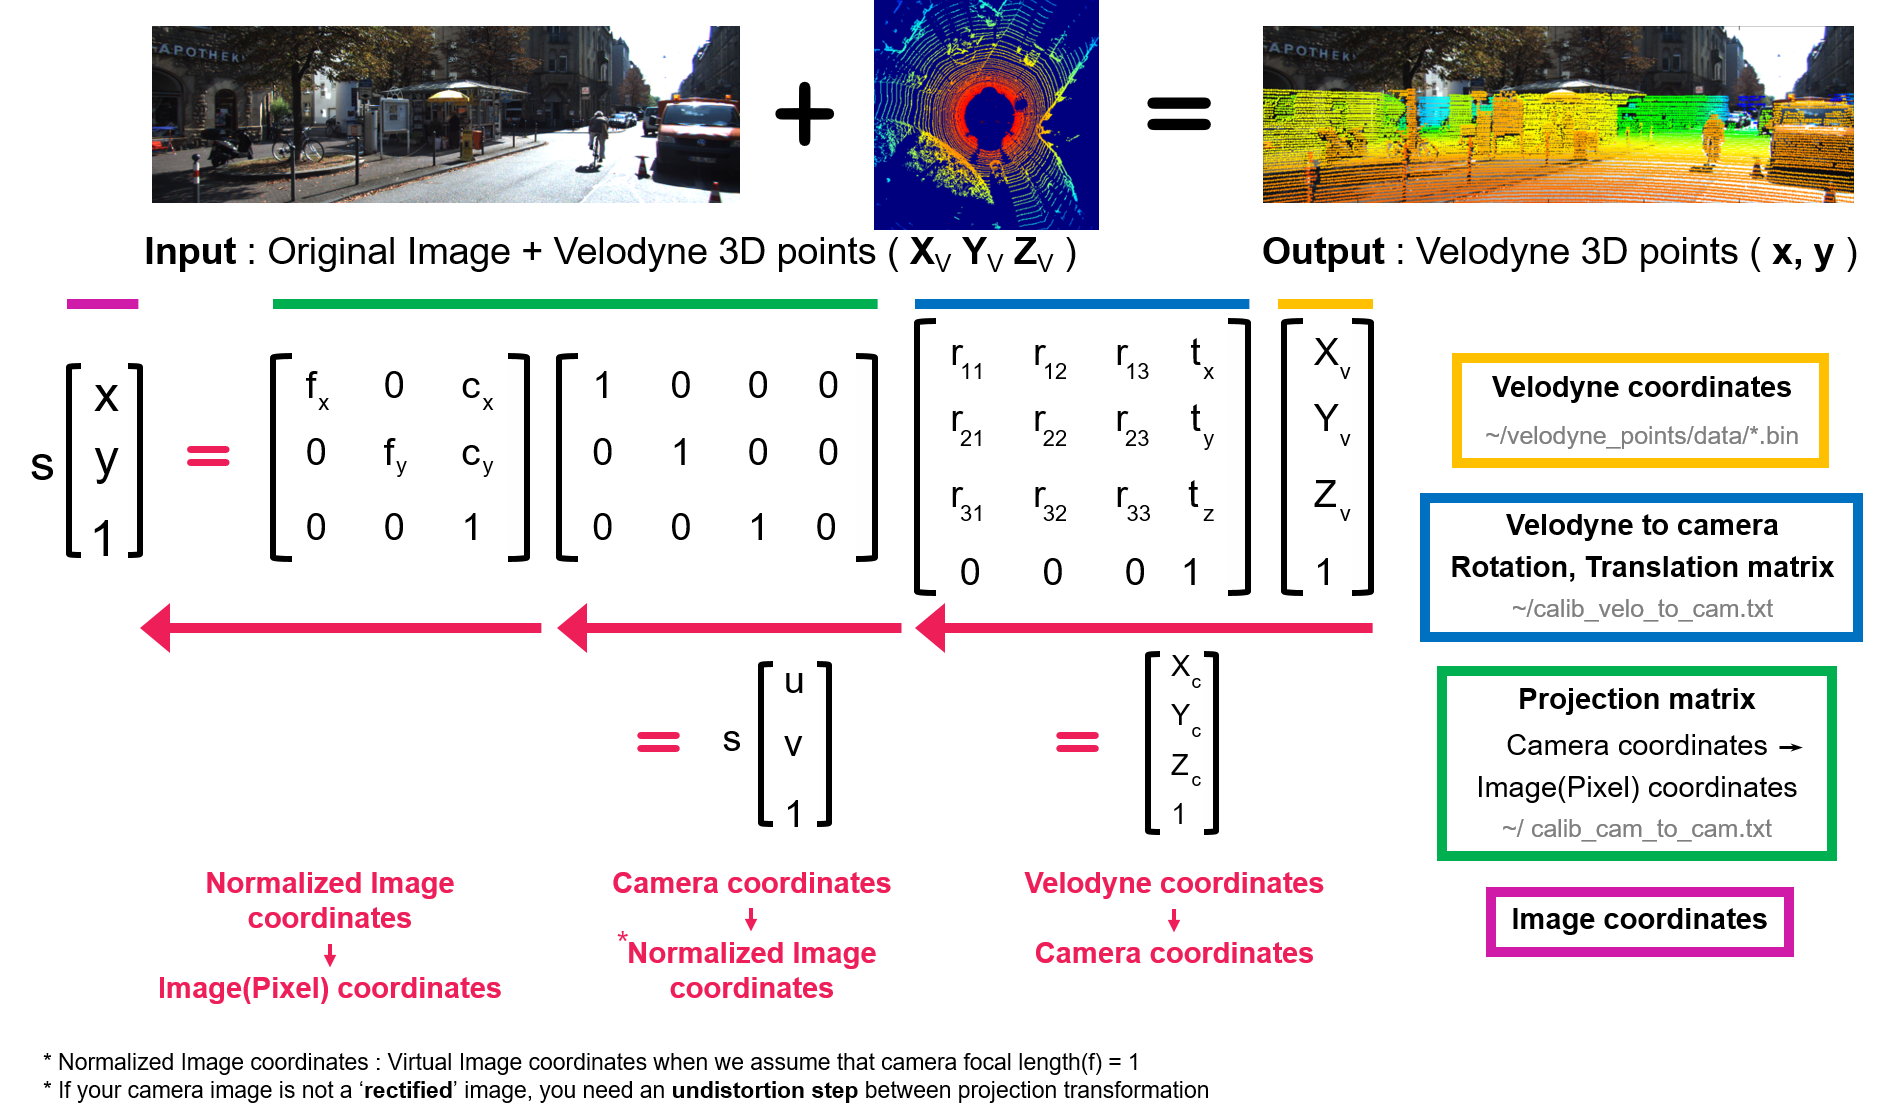

In [3]:
Image(filename='C:\\sabeeha\\others\\python project\\KITTI_Tutorial_original\\process.png')

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from kitti_foundation import Kitti, Kitti_util
%matplotlib inline

velo_path = 'E:\\kitti_dataset\\2011_09_26\\2011_09_26_drive_0059_sync\\velodyne_points\\data'

velo = Kitti(frame=326, velo_path=velo_path)
frame = velo.velo_file



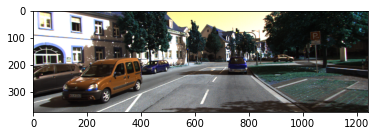

In [172]:
import matplotlib.image as mpimg
import cv2

# #read left camera image
# image_type = 'gray'  # 'gray' or 'color' image
# mode = '00' if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\image_02\\data'

# print frame 89 camera image
camera = Kitti(frame=326,camera_path=image_path)
image = camera.camera_file

plt.imshow(image)
# print(image.shape)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from kitti_foundation import Kitti, Kitti_util
import matplotlib.image as mpimg
import cv2
%matplotlib inline

def print_projection_plt1(points, color, image):
    """ project converted velodyne points into camera image """
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    for i in range(points.shape[1]):
        cv2.circle(hsv_image, (np.int32(points[0][i]),np.int32(points[1][i])),2, (int(color[i]),255,255),-1)

    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

def print_projection_plt(points,col, image):
    """ project converted velodyne points into camera image """
   
    color = [(255,0,0),(0,255,0),(0,0,255),(255,128,0),(255,255,0),(125,255,0),(255,255,0),(0,0,255),
         (255,0,255),(255,200,229),(255,255,204)]
    for i in range(points.shape[1]):
         cv2.circle(image, (np.int32(points[0][i]),np.int32(points[1][i])),2, (color[int(col[i]%8)]),-1)


    return image

def print_projection_plt2(points,col, image):
    """ project converted velodyne points into camera image """
   
    color = [(255,0,0),(0,255,0),(0,0,255),(255,128,0),(255,255,0),(125,255,0),(255,255,0),(0,0,255),
         (255,0,255),(255,200,229),(255,255,204)]
    for i in range(points.shape[1]):
         cv2.circle(image, (np.int32(points[0][i]),np.int32(points[1][i])),10, (color[int(col[i]%8)]),-1)


    return image

#  Projecting velodyne points into camera image

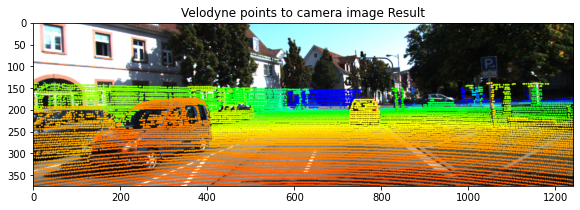

In [61]:
""" save one frame about projecting velodyne points into camera image """
image_type = 'gray'  # 'gray' or 'color' image
mode = '00' if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\image_02\\data'
velo_path = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\velodyne_points\\data'

v_fov, h_fov = (-24.9, 2.0), (-90, 90)

v2c_filepath = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\calib_velo_to_cam.txt'
c2c_filepath = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\calib_cam_to_cam.txt'
fn = "C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\label_02\\0000000326.txt"

res = Kitti_util(frame=326, camera_path=image_path, velo_path=velo_path, 
                v2c_path=v2c_filepath, c2c_path=c2c_filepath)

img, pnt, c_ = res.velo_projection_frame(v_fov=v_fov, h_fov=h_fov)
xy_i = pnt[::] / pnt[::][2]
ans = np.delete(xy_i, 2, axis=0)
# result = print_projection_plt(ans, c_, img)
centre_2d= []
with open (fn, 'r') as f :
    for i, line in enumerate(f.readlines()):
      if len(line) > 3:
        key, value = line.split(' ',1)
        centre = [float(x) for x in value.split()]
        centre_2d.append([centre[3]+(centre[5] - centre[3])/2, centre[4]+(centre[6]-centre[4])/2])
    centre_2d = np.array(centre_2d)
    centre_2d = centre_2d.T   
  
result = print_projection_plt1(ans,c_, img)    

#display result image
plt.subplots(1,1, figsize = (13,3) )
plt.title("Velodyne points to camera image Result")
plt.imshow(result)



[[760.  263.5  96.5 450.  928. ]
 [205.  262.  267.  210.5 176. ]]
[0. 0. 0. ... 4. 4. 4.]


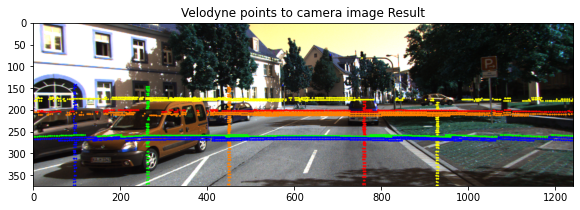

In [37]:
'''viewing horizontal and vertical lines points of LiDAR projecting to the centre of vehicles on the image
temp and temp_ representing x and y projcted coordinates of LiDAR on image. c_ reprenting the order of
vehciles and corresponding color '''
temp = []
temp_ = []
Image(img)
c_ =[]
print(centre_2d)
""" save one frame about projecting velodyne points into camera image """
image_type = 'gray'  # 'gray' or 'color' image
mode = '00' if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\image_02\\data'
velo_path = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\velodyne_points\\data'

v_fov, h_fov = (-24.9, 2.0), (-90, 90)

v2c_filepath = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\calib_velo_to_cam.txt'
c2c_filepath = 'C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\calib_cam_to_cam.txt'
fn = "C:\\sabeeha\\KITTI\\2011_09_26_drive_0059_sync\\label_02\\0000000326.txt"

res = Kitti_util(frame=326, camera_path=image_path, velo_path=velo_path, 
                v2c_path=v2c_filepath, c2c_path=c2c_filepath)

img, pnt, c_ = res.velo_projection_frame(v_fov=v_fov, h_fov=h_fov)
org_img = img
for i in range(len(centre_2d[0])):    

    for j in range(len(ans[0])):
        if int(ans[0][j])-4 < int(centre_2d[0][i]) and int(centre_2d[0][i]) < int(ans[0][j])+4:
            temp.append([i,ans[0][j],ans[1][j]])
            
    for j in range(len(ans[1])):        
        if int(ans[1][j])-5 < int(centre_2d[1][i]) and int(centre_2d[1][i])< int(ans[1][j])+5:
            temp_.append([i,ans[0][j],ans[1][j]])   

temp = np.array(temp).T
temp_ = np.array(temp_).T
temp = np.concatenate((temp,temp_),axis=1)
c_ = temp[0,:]
temp = np.delete(temp,0,axis=0)
print(c_)
Lines_result = print_projection_plt(temp,c_, img)    

plt.subplots(1,1, figsize = (13,3) )
plt.title("Velodyne points to camera image Result")
plt.imshow(Lines_result)


In [63]:
#Code for fining 3d coordinates of the centre refrencing with 3d LiDAR coords
c_ =[]
best_h=[]
best_v=[]
best_points = []

P2 = [7.215377e+02, 0.000000e+00, 6.095593e+02,4.485728e+0, 10.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01,0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]
P = np.array([float(x) for x in P2])
P = np.reshape(P,(3,4))
P = np.delete(P,3,axis=1)
#converting object to camera projection matrix into camera to object coordinates projection
P= np.linalg.inv(P) 


for i in range(len(centre_2d[0])):    
    temp = []
    temp_ = []
    print(centre_2d[0][i],centre_2d[1][i])
    for j in range(len(ans[0])):
        if int(ans[0][j])-10 < int(centre_2d[0][i]) and int(centre_2d[0][i]) < int(ans[0][j])+10:
            temp.append([j,ans[0][j],ans[1][j]])
      
    for j in range(len(ans[1])):        
        if int(ans[1][j])-10 < int(centre_2d[1][i]) and int(centre_2d[1][i])< int(ans[1][j])+10:
            temp_.append([j,ans[0][j],ans[1][j]])   
      
    best_diff_h = 1000
    for k in range(len(temp)):
         if centre_2d[1][i] > temp[k][2]-10 and  temp[k][2]+10 > centre_2d[1][i]:
            diff = abs(temp[k][2]-centre_2d[1][i])+abs(temp[k][1]-centre_2d[0][i])
            if diff< best_diff_h:
               best_diff_h = diff
               best_h = [temp[k][1],temp[k][2],pnt[2][temp[k][0]]]
                
    #finding best point on vertical line
    best_diff_v = 1000
    for k in range(len(temp_)):
        #print(temp_[k])
        if centre_2d[0][i]-10 < temp_[k][1] and temp_[k][2]+10 <centre_2d[0][i]:
            diff = abs(temp_[k][2]-centre_2d[1][i])+  abs(temp_[k][1]-centre_2d[0][i])
            if diff< best_diff_v:
               best_diff_v = diff
               #print(temp_[k])
               best_v = [temp_[k][1],temp_[k][2],pnt[2][temp_[k][0]]]
            
    # choosing best of vertical vs horizontal                
    if best_diff_v < best_diff_h:
        best_points.append([centre_2d[0][i]*best_v[2],centre_2d[1][i]*best_v[2],best_v[2]])
    else:
        best_points.append([centre_2d[0][i]*best_h[2],centre_2d[1][i]*best_h[2],best_h[2]])
    
    #for converting camera 3d centre point in object coordinates
    best_points[i] = np.array([float(x) for x in best_points[i]])
    best_points[i] = np.around(best_points[i],2)
    best_points[i] = np.matmul(P, best_points[i])
    
print(best_points)

760.0 205.0
263.5 262.0
96.5 267.0
450.0 210.5
928.0 176.0
[[13081.232092892407, 3528.4902355828203, 17.212147490647904], [2008.0109839440374, 1996.5801813788912, 7.620535043430882], [994.1534194677514, 2750.662828993675, 10.302107973759082], [9349.6921478263, 4373.578215816525, 20.777093661836222], [34727.90608259878, 6586.327015665287, 37.42231258900731]]


[[760.  263.5  96.5 450.  928. ]
 [205.  262.  267.  210.5 176. ]
 [  1.    1.    1.    1.    1. ]]


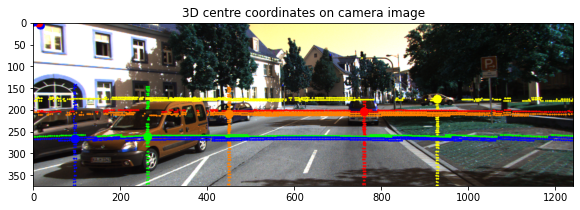

In [66]:
#code to print LiDAR points centres on the Lined-Image

c_ = [i for i in range(len(centre_2d[0]))]
best_points = np.array(best_points)
best_points = best_points.T

best_points_image = best_points[::] /best_points[::][2]

LiDAR_centre_result = print_projection_plt2(centre_2d,c_, Lines_result)    
#converting best points back to image coordinates


print(best_points_image)
plt.subplots(1,1, figsize = (13,3) )
plt.title("3D centre coordinates on camera image")
plt.imshow(LiDAR_centre_result)


** save **